In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [4]:
import numpy as np
import pandas as pd

#회귀모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#분류모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [16]:
#데이터불러오기
df = pd.read_csv("./data/05_iris.csv")

In [10]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [15]:
# 상관계수 
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


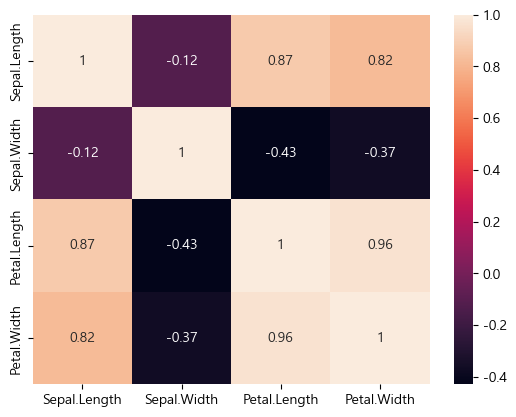

In [12]:
sns.heatmap(df.corr(), annot = True)  # anot: 수치 표현 
plt.show()

In [20]:
# feature(x) 잡기, specis 칼럼 제거
feature = df.iloc[:, :-1]
feature

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# 타겟(y) 잡기
target = df.loc[:, 'Sepal.Length']
target

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [23]:
#회귀모델 객체생성 
model = LinearRegression()

In [35]:
#학습데이터와 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 40 )  # test : train = (dafault) 20: 80  

In [34]:
# x_train.head()
# x_test.head()
y_test.head()
y_train.head()

113    5.7
15     5.7
3      4.6
86     6.7
127    6.1
Name: Sepal.Length, dtype: float64

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 113 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  112 non-null    float64
 1   Sepal.Width   112 non-null    float64
 2   Petal.Length  112 non-null    float64
 3   Petal.Width   112 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [37]:
#모델 생성하고 학습
model = LinearRegression() # 모델 생성
model.fit(x_train, y_train)  # 학습시키기
model

LinearRegression()

In [38]:
#예측하기
pred = model.predict(x_test)
pred

array([4.4, 5.6, 6.4, 7.7, 5.5, 6.3, 6.2, 5.6, 5.4, 5.2, 5.5, 4.8, 5. ,
       6.2, 5.7, 6.7, 6.3, 6.7, 6.8, 5.2, 6.4, 7.6, 5.5, 5.1, 5.6, 5.7,
       4.3, 6.5, 4.9, 5.5, 6. , 5.1, 5. , 5.3, 4.7, 6.4, 4.6, 4.4])

In [39]:
y_test

38     4.4
66     5.6
115    6.4
117    7.7
89     5.5
136    6.3
68     6.2
94     5.6
84     5.4
28     5.2
90     5.5
11     4.8
40     5.0
126    6.2
79     5.7
144    6.7
123    6.3
124    6.7
76     6.8
59     5.2
132    6.4
105    7.6
53     5.5
17     5.1
64     5.6
18     5.7
13     4.3
116    6.5
9      4.9
81     5.5
62     6.0
23     5.1
26     5.0
48     5.3
2      4.7
128    6.4
6      4.6
42     4.4
Name: Sepal.Length, dtype: float64

In [41]:
#평가하기(1) RMSE
RMSE = np.sqrt(np.mean((y_test - pred)**2))
RMSE

4.778644918425904e-16

In [42]:
#평가하기(2) mean_squared_error 
np.sqrt(mean_squared_error(y_test, pred))

4.778644918425904e-16

In [43]:
# 타입맞추기
lm = pd.DataFrame()
lm['test'] = y_test 
lm['pred'] = pred
lm = lm.reset_index()
lm = lm.iloc[:, 1:]
lm

,test,pred
0,4.4,4.4
1,5.6,5.6
2,6.4,6.4
3,7.7,7.7
4,5.5,5.5
5,6.3,6.3
6,6.2,6.2
7,5.6,5.6
8,5.4,5.4
9,5.2,5.2


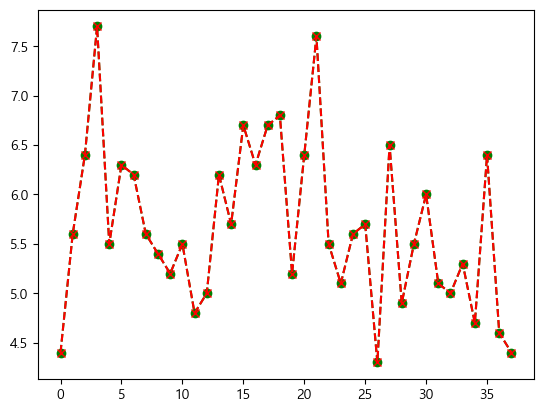

In [44]:
# 그래프 그리기
plt.plot(list(y_test), 'go--')
plt.plot(list(pred), 'rx--')
plt.show()

In [45]:
#분류모델
#feature encoding
feature = df.loc[:, 'Sepal.Length':'Petal.Width']
feature

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
#target encoding
target = df.loc[:, 'Species']
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [47]:
#학습데이터와 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 40 )  # test : train = (dafault) 20: 80  


In [48]:
#학습 
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model

DecisionTreeClassifier()

In [49]:
# 예측
pred = model.predict(x_test)
pred

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa'], dtype=object)

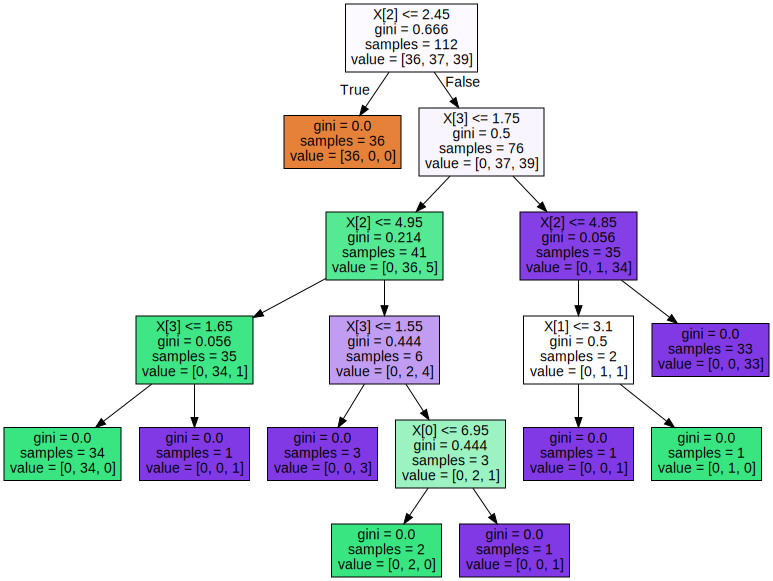

In [53]:
#DecisionTree 시각적 표현
#conda install python-graphviz
from sklearn.tree import export_graphviz
import graphviz

# .dot 파일로 export  
export_graphviz(model, out_file='tree.dot', impurity=True, filled=True)

# 생성된 tree.dot 파일을 읽어서 시각화
with open('tree.dot') as fp:
  dot_graph = fp.read()

graphviz.Source(dot_graph)

In [54]:
#평가
accuracy_score(y_test, pred)

1.0